<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Desafio_Evaluaci%C3%B3nML_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

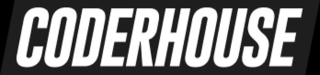

# **CURSO DE DATA SCIENCE**

# **DESAFIO EVALUACION ML**

# **DESAFIO N° 13**

*AUTOR:Eduardo ETTLIN
*

In [1]:
#Conectamos mi drive
from google.colab import drive
#Importamos OS
import os
#Montamos drive
drive.mount('/content/gdrive', force_remount=True)
# Establecer ruta de acceso en drive
import os
print(os.getcwd())

Mounted at /content/gdrive
/content


In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Me muevo a la carpeta
os.chdir("/content/gdrive/MyDrive/DScience_41870")
print(os.getcwd())

#Lectura del dataframe
datos=pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv',sep=',',nrows=2845000)  # nrows: 1500000  # Disminuir Tamaño a 1.5 MM (Riginalmente Tiene 2.845.342 registros)

/content/gdrive/MyDrive/DScience_41870


In [5]:
datos.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


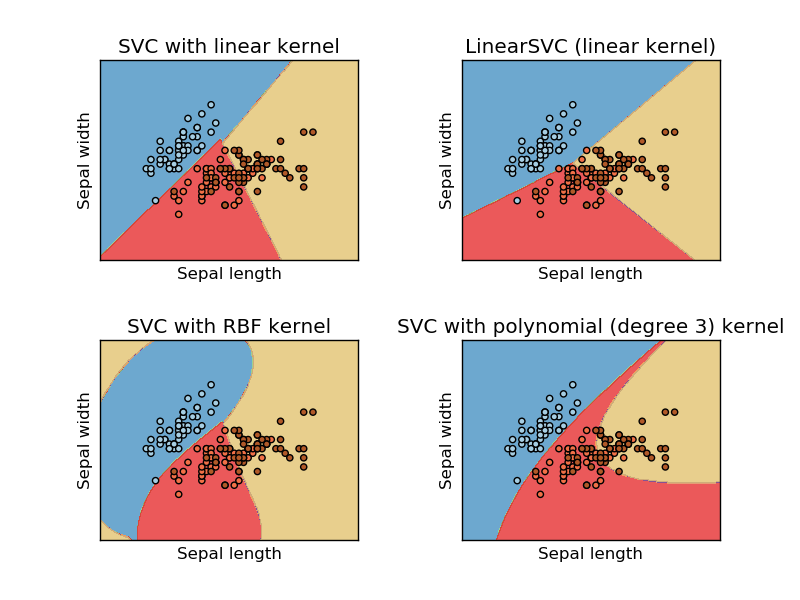

# REDUCCIÓN DEL DATASET - Es Muy Grande para PROCESARLO

Se utilizara la función sample para muestrear todo el DataSet.

In [6]:
df= datos.sample(50000)   # Achicar el Set de Datos porque no alcanza a calcular.

In [7]:
df.Severity.unique()

array([4, 3, 2, 1])

In [8]:
df.shape

(50000, 47)

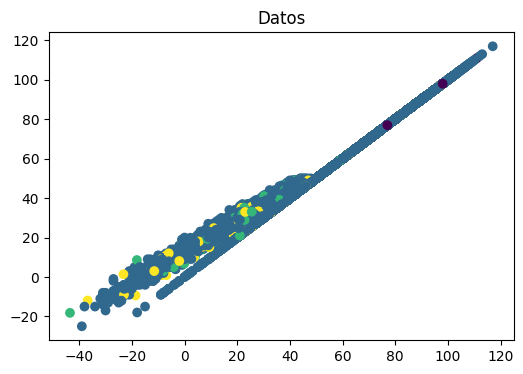

In [9]:
#Visualizacion!
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['Wind_Chill(F)'], df['Temperature(F)'], c=df.Severity);
ax.set_title("Datos");

In [10]:
X = df.fillna(0, inplace=True)

In [11]:
# División de los datos en train y test
X = df.drop(columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Give_Way', 'Junction', 'No_Exit','Roundabout',  'Stop',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight',
       'Traffic_Calming', 'Traffic_Signal','Railway','Crossing', 'Station', 'Bump'], axis= 1) # Matriz de 2 columnas -Variable Independientes   'Temperature(F)', 'Wind_Chill(F)'
y = df['Severity'] # Vector de 200 filas y 1 columa- Variable Dependiente

In [12]:
X

,Temperature(F),Wind_Chill(F)
2623549,56.7,0.0
2816530,74.0,74.0
736928,54.0,54.0
1016780,79.0,79.0
2039914,50.0,50.0
...,...,...
593886,69.0,69.0
2170714,72.0,72.0
526345,40.0,40.0
415273,81.0,81.0


In [13]:
y

2623549    4
2816530    3
736928     2
1016780    2
2039914    2
          ..
593886     2
2170714    2
526345     2
415273     2
302079     2
Name: Severity, Length: 50000, dtype: int64

In [14]:
 y.values.reshape(-1,1)

array([[4],
       [3],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

**gamma** es un parámetro para hiperplanos no lineales. Cuanto mayor sea el valor de gamma, intentará ajustarse exactamente al conjunto de datos de entrenamiento.

**C** es el parámetro de penalización del término de error. Controla el equilibrio entre un límite de decisión uniforme y la clasificación correcta de los puntos de entrenamiento.

In [16]:
SVC?

In [17]:
# Creación del modelo SVM
modelo = SVC(C=0.1,kernel='sigmoid',random_state=42, verbose= True)
modelo.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, kernel='sigmoid', random_state=42, verbose=True)

El Entrenamiento Tardó 10 Minutos.

In [18]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [19]:
X_test

,Temperature(F),Wind_Chill(F)
1769124,65.0,65.0
2298464,39.0,33.0
1891342,37.0,37.0
872513,86.0,86.0
1325069,87.0,87.0
...,...,...
2674655,46.0,43.1
2607534,88.0,0.0
290994,73.0,73.0
196843,79.0,0.0


In [20]:
X_test.shape

(12500, 2)

In [21]:
y_test_pred

array([2, 2, 2, ..., 2, 2, 2])

In [22]:
y_test

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [23]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.88448


# **RF y ARBOLES**

In [24]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
df_num = df.select_dtypes('number') # datos númericos
df_num['Stop'] = df['Stop']
df_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop
2623549,4,40.242906,-103.923214,40.252900,-103.882455,2.258,0.0,56.7,0.0,49.0,30.30,10.0,6.9,0.0,False
2816530,3,36.872350,-76.195640,36.878800,-76.201930,0.565,0.0,74.0,74.0,97.0,29.86,8.0,8.0,0.0,False
736928,2,34.031685,-118.418744,34.031315,-118.413174,0.320,0.0,54.0,54.0,75.0,29.88,10.0,6.0,0.0,False
1016780,2,25.940088,-80.269429,25.940025,-80.270868,0.090,0.0,79.0,79.0,56.0,30.02,10.0,12.0,0.0,False
2039914,2,35.066361,-80.990597,35.067272,-80.990373,0.064,3070.0,50.0,50.0,77.0,29.36,10.0,0.0,0.0,False


**Insights**:

* El dataset se compone de 47 columnas de las cuales 46 corresponden a variables independientes, que usaremos para predecir el target.

* Classification es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.


In [26]:
df_num.Stop.unique()

array([False,  True])

In [27]:
## Convertimos la variable Stop a valores enteros
#df_num['Stop'] = df_num.Stop.map({'False':0 , 'True':1})
df_num.Stop = df_num.Stop.replace({True: 1, False: 0})

In [28]:
df_num.Stop.unique()

array([0, 1])

In [29]:
#Separamos en X e y
X = df_num.drop(["Severity"], axis=1)
y = df_num["Severity"]

In [30]:
#Separamos en train y test!
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

In [31]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación:

1.Calcular la métrica Accuracy.

In [33]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8402

2.Crear la Matriz de Confusión

In [34]:
###Completar
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[   63,    53,    11,     1],
       [   93, 12175,   592,   518],
       [   10,   512,   228,    66],
       [    2,   465,    74,   137]])

3. Calcular la métrica Recall

In [35]:
#Convertimos en df la salida
dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfs

,Actual,Predicted
1237286,2,2
490935,2,2
2068425,2,2
2528779,3,2
1734894,2,2
...,...,...
468635,2,2
1554199,2,2
921706,2,2
430980,2,2


In [36]:
dfs.describe()

,Actual,Predicted
count,15000.000000,15000.000000
mean,2.136267,2.145400
std,0.474531,0.492891
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,4.000000,4.000000


In [37]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1237286 to 188301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Actual     15000 non-null  int64
 1   Predicted  15000 non-null  int64
dtypes: int64(2)
memory usage: 351.6 KB


In [38]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred, pos_label='positive', average='micro')

0.8402

4.Calcular la métrica F1 score

In [39]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred, pos_label='positive', average='micro')

0.8402

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, pos_label='positive', average='micro')

0.8402

# Random Forest

In [41]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [42]:
y_test_pred = model.predict(X_test) #Prediccion en Test

1.Calcular la métrica Accuracy.

In [43]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8996

2. Calcular la métrica Precision

In [44]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred, pos_label='positive', average='micro')

0.8996

3. Calcular la métrica Recall

In [45]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred, pos_label='positive', average='micro')

0.8996

4. Calcular la métrica F1 Score

In [46]:
###Completar
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, pos_label='positive', average='micro')

0.8996

# SVM

In [47]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Usaremos DF_NUM como df de datos**



In [48]:
# División de los datos en train y test
X

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Stop
2623549,40.242906,-103.923214,40.252900,-103.882455,2.258,0.0,56.7,0.0,49.0,30.30,10.0,6.9,0.0,0
2816530,36.872350,-76.195640,36.878800,-76.201930,0.565,0.0,74.0,74.0,97.0,29.86,8.0,8.0,0.0,0
736928,34.031685,-118.418744,34.031315,-118.413174,0.320,0.0,54.0,54.0,75.0,29.88,10.0,6.0,0.0,0
1016780,25.940088,-80.269429,25.940025,-80.270868,0.090,0.0,79.0,79.0,56.0,30.02,10.0,12.0,0.0,0
2039914,35.066361,-80.990597,35.067272,-80.990373,0.064,3070.0,50.0,50.0,77.0,29.36,10.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593886,34.106752,-80.917149,34.105736,-80.916430,0.081,2.0,69.0,69.0,27.0,30.13,10.0,6.0,0.0,0
2170714,34.068283,-118.150994,34.068283,-118.150994,0.000,0.0,72.0,72.0,57.0,29.81,10.0,3.0,0.0,0
526345,40.439783,-78.240090,40.422593,-78.269610,1.955,2100.0,40.0,40.0,77.0,28.48,10.0,3.0,0.0,0
415273,29.767356,-95.212565,29.768007,-95.213191,0.059,12615.0,81.0,81.0,79.0,29.85,10.0,8.0,0.0,0


In [49]:
y

2623549    4
2816530    3
736928     2
1016780    2
2039914    2
          ..
593886     2
2170714    2
526345     2
415273     2
302079     2
Name: Severity, Length: 50000, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

In [ ]:
# Creación del modelo SVM
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

El entrenamiento luego de 150 minutos seguía procesando. Reduje significativamente el tamaño del dataset. Se filtró utilizando sample para garantizar coherencia de datos. Por ello Severity obtuvo todos los valores del original. Entiendo que el ejercicio es analizar modelos y creo que se puede ver reflejado en el Notebook pero no funciona con SVC

In [ ]:
#Predicciones!
y_test_pred = modelo.predict(X_test)

In [ ]:
#Convertimos en df la salida
dfs2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dfs2

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación:

1. Calcular la métrica Accuracy.

In [ ]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred, pos_label='positive', average='micro')

2. Crear la Matriz de Confusión

In [ ]:
###Completar
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

3. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred, pos_label='positive', average='micro')

Calcular todas las metricas al mismo tiempo

In [ ]:
from sklearn.metrics import classification_report
reporte=classification_report(y_test,y_test_pred, pos_label='positive', average='micro')
print(reporte)